### IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import csv

### READ DATA ['Athletes.csv']

In [3]:
Athletes = pd.read_csv('Athletes.csv', encoding= 'unicode_escape')
Athletes.head()

,Name,NOC,Discipline
0,Aalerud Katrine,Norway,Cycling Road
1,Abad Nestor,Spain,Artistic Gymnastics
2,Abagnale Giovanni,Italy,Rowing
3,Abalde Alberto,Spain,Basketball
4,Abalde Tamara,Spain,Basketball


### READ DATA ['EntriesGender.csv']

In [4]:
Gender   = pd.read_csv('EntriesGender.csv')
Gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


### READ DATA ['Medals.csv']

In [5]:
Medals   = pd.read_csv('Medals.csv')
Medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [13]:
Medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


In [14]:
Athletes.isnull().sum()

Name          0
NOC           0
Discipline    0
dtype: int64

### PERIKSA COLUMN YG DUPLICATE

In [19]:
Athletes.duplicated().sum()

0

### DROP COLUMN YG DUPLICATE

In [18]:
Athletes.drop_duplicates(subset=None, keep='first', inplace=True)
Athletes

,Name,NOC,Discipline
0,Aalerud Katrine,Norway,Cycling Road
1,Abad Nestor,Spain,Artistic Gymnastics
2,Abagnale Giovanni,Italy,Rowing
3,Abalde Alberto,Spain,Basketball
4,Abalde Tamara,Spain,Basketball
...,...,...,...
11080,Zwicker Martin Detlef,Germany,Hockey
11081,Zwolinska Klaudia,Poland,Canoe Slalom
11082,Zykova Yulia,ROC,Shooting
11083,Zyuzina Ekaterina,ROC,Sailing


### JUMLAH ATLET PADA TIAP NOC

#### USA menjadi NOC yang memiliki atlet terbanyak, disusul oleh Jepang dan Australia, kemudian China, dan Jerman

In [22]:
Athletes['NOC'].value_counts()

United States of America         615
Japan                            586
Australia                        470
People's Republic of China       401
Germany                          400
                                ... 
St Vincent and the Grenadines      2
Saint Kitts and Nevis              2
Andorra                            2
Dominica                           2
Bermuda                            2
Name: NOC, Length: 206, dtype: int64

#### Melakukan analisis pada atlet Indonesia 

In [43]:
Athletes_Indonesia = Athletes.loc[Athletes['NOC'] == 'Indonesia'].sort_values('Discipline', ascending = True)
Athletes_Indonesia[['Name', 'Discipline']]

,Name,Discipline
1786,Choirunisa Diananda,Archery
8522,Salsabilla Riau Ega,Archery
7867,Prastyadi Alviyanto,Archery
2547,Dwi Pangestu Arif,Archery
11063,Zohri Lalu Muhammad,Athletics
9598,Tehupeiory Alvin,Athletics
9401,Sukamuljo Kevin Sanjaya,Badminton
8850,Setiawan Hendra,Badminton
7351,Jordan Praveen,Badminton
6391,Gideon Marcus Fernaldi,Badminton


In [51]:
Ath_Indo_Count = Athletes_Indonesia.groupby('Discipline').count().reset_index()
Ath_Indo_Count[['Discipline', 'Name']]

,Discipline,Name
0,Archery,4
1,Athletics,2
2,Badminton,10
3,Rowing,1
4,Shooting,1
5,Surfing,1
6,Swimming,2
7,Weightlifting,5


c:\users\novrianti\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


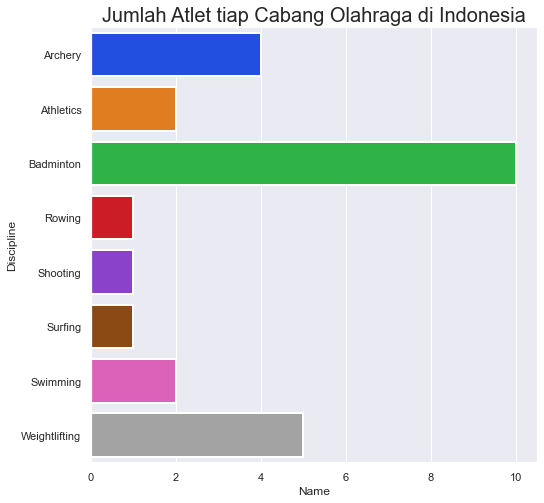

In [57]:
plt.figure(figsize=(8,8))
sns.set(rc = None)
sns.barplot(Ath_Indo_Count['Name'],Ath_Indo_Count['Discipline'],
            palette = sns.color_palette("bright", 
            n_colors=30), linewidth = 2)
plt.title('Jumlah Atlet tiap Cabang Olahraga di Indonesia', fontsize = 20)
plt.show()

In [82]:
# Gender_Badminton = Gender.loc[Gender['Discipline'] == 'Badminton']
# Gender_Badminton.head(5)

In [83]:
Athletes.shape

(11084, 3)

In [86]:
Medals_Indonesia = Medals.loc[Medals['Team/NOC'] == 'Indonesia']
Medals_Malaysia = Medals.loc[Medals['Team/NOC'] == 'Malaysia']
Medals_Philipina = Medals.loc[Medals['Team/NOC'] == 'Philipina']
Medals_Brunei = Medals.loc[Medals['Team/NOC'] == 'Brunei_Darussalam']
Medals_Kamboja = Medals.loc[Medals['Team/NOC'] == 'Kamboja']
Medals_Singapore = Medals.loc[Medals['Team/NOC'] == 'Singapore']
Medals_Thailand = Medals.loc[Medals['Team/NOC'] == 'Thailand']

Medals_ASEAN = [Medals_Indonesia, Medals_Malaysia, Medals_Thailand,  Medals_Philipina, Medals_Brunei, Medals_Kamboja, Medals_Singapore]

result = pd.concat(Medals_ASEAN)
result

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
54,55,Indonesia,1,1,3,5,42
74,74,Malaysia,0,1,1,2,66
61,59,Thailand,1,0,1,2,66


c:\users\novrianti\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


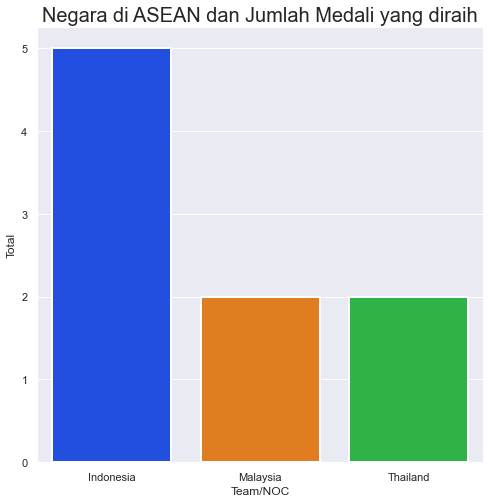

In [88]:
plt.figure(figsize=(8,8))
sns.set(rc = None)
sns.barplot(result['Team/NOC'],result['Total'],
            palette = sns.color_palette("bright", 
            n_colors=30), linewidth = 2)
plt.title('Negara di ASEAN dan Jumlah Medali yang diraih', fontsize = 20)
plt.show()

#### Jumlah Atlet pada Seluruh Negara di Dunia

In [104]:
# The Top 50 Countries with maximum Athletes
Country_Top = Athletes_Country.head(50)
Country_Top

,NOC,Name,Discipline
195,United States of America,615,615
94,Japan,586,586
10,Australia,470,470
144,People's Republic of China,401,401
71,Germany,400,400
67,France,377,377
33,Canada,368,368
73,Great Britain,366,366
92,Italy,356,356
174,Spain,324,324


<Figure size 432x288 with 0 Axes>

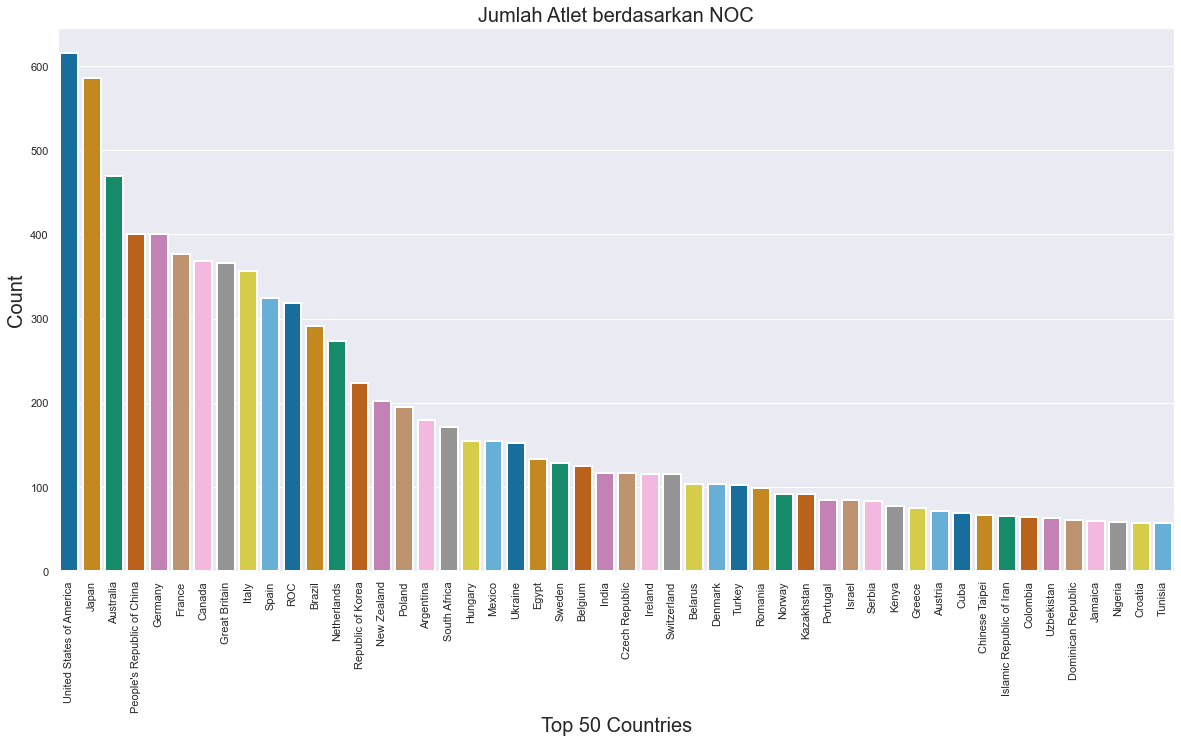

In [106]:
# Plotting the Top 50 countries
plt.figure()
sns.set(rc = None)
plt.figure(figsize=(20,10))
sns.barplot(x=Country_Top['NOC'], 
            y=Country_Top['Discipline'], 
            linewidth = 2,
            palette = sns.color_palette("colorblind", 
            n_colors=30))
plt.xticks(rotation = 90)
plt.xlabel('Top 50 Countries', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title('Jumlah Atlet berdasarkan NOC', fontsize = 20)
plt.show()

In [107]:
Gender.sample(10)

,Discipline,Female,Male,Total
28,Rhythmic Gymnastics,96,0,96
17,Diving,72,71,143
29,Rowing,257,265,522
43,Water Polo,122,146,268
22,Handball,168,168,336
7,Basketball,144,144,288
31,Sailing,175,175,350
37,Table Tennis,86,86,172
39,Tennis,94,97,191
10,Canoe Slalom,41,41,82


#### Analisis pada Data Gender

In [108]:
Gender.shape

(46, 4)

In [109]:
Gender.Discipline.duplicated().any()

False

In [110]:
Gender.isnull().sum()

Discipline    0
Female        0
Male          0
Total         0
dtype: int64

#### Jumlah Atlet berdasarkan Discipline 'Swimming'

c:\users\novrianti\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



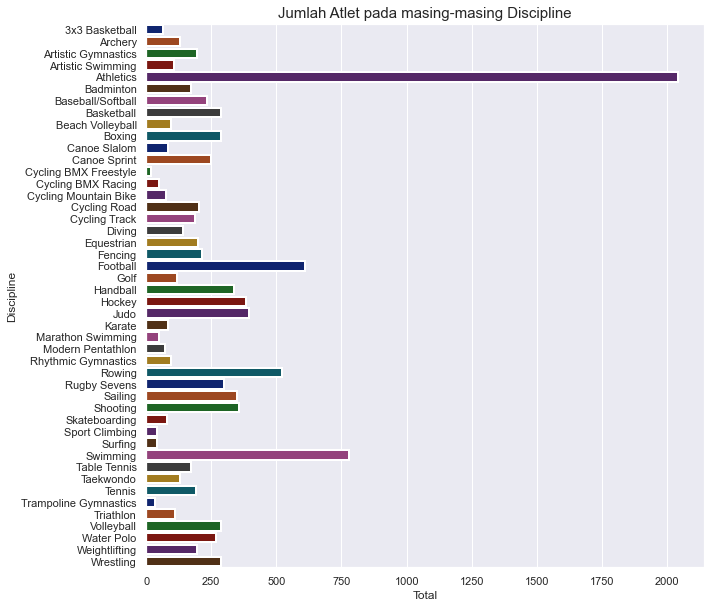

In [112]:
plt.figure(figsize=(10,10))
sns.set(rc = None)
sns.barplot(Gender['Total'],Gender['Discipline']
            ,palette = sns.color_palette("dark", 
            n_colors=30),linewidth = 2)
plt.title('Jumlah Atlet pada masing-masing Discipline', fontsize = 15)
plt.show()

#### Jumlah Atlet Laki-laki pada masing-masing Discipline

c:\users\novrianti\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



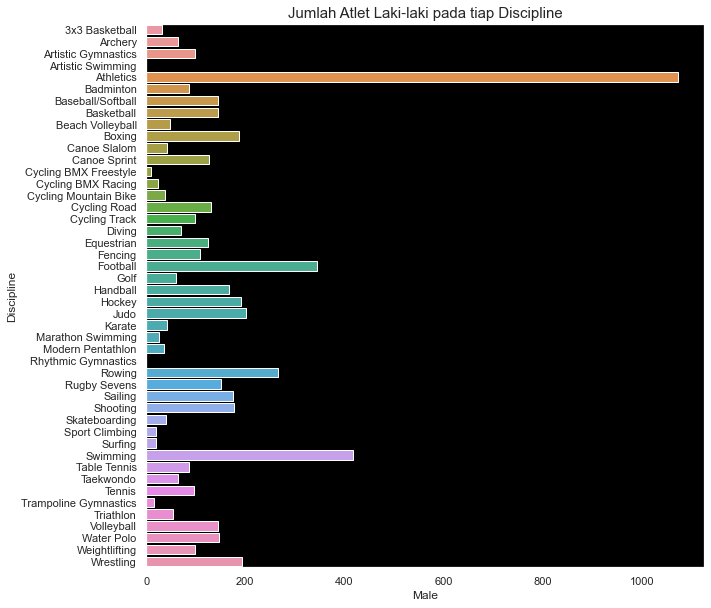

In [117]:
plt.figure(figsize=(10,10))
sns.set(rc = {'axes.facecolor': 'black', 'axes.grid': False,})
sns.barplot(Gender['Male'],Gender['Discipline'],)
plt.title('Jumlah Atlet Laki-laki pada tiap Discipline', fontsize = 15)
plt.show()

#### Jumlah Atlet Perempuan pada masing-masing Discipline

c:\users\novrianti\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



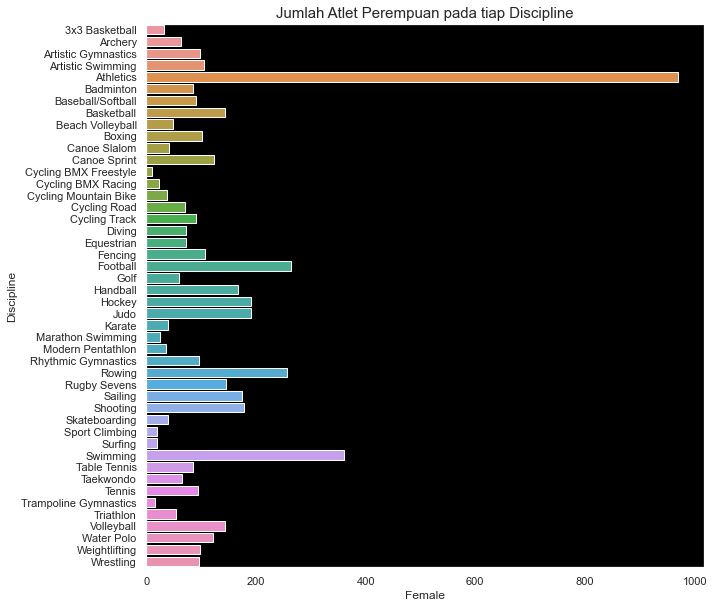

In [116]:
plt.figure(figsize=(10,10))
sns.set(rc = {'axes.facecolor': 'black', 'axes.grid': False,})
sns.barplot(Gender['Female'],Gender['Discipline'])
plt.title('Jumlah Atlet Perempuan pada tiap Discipline', fontsize = 15)
plt.show()

#### Comparing total male dan female  

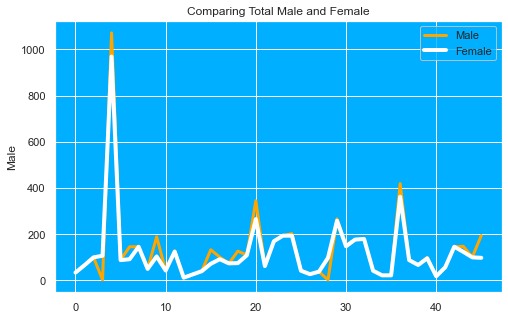

In [118]:
plt.figure(figsize=(8,5))
sns.set(rc = {'axes.facecolor': '#00afff', 'axes.grid': True,})
sns.lineplot(data = Gender['Male'], linewidth = 3
             ,label = 'Male', color = 'orange')
sns.lineplot(data = Gender['Female'], linewidth = 4
             ,label = 'Female', color = 'white')
plt.title('Comparing Total Male and Female')
plt.show()

In [119]:
Female_participants = Gender['Female'].sum()
Female_participants

5432

In [120]:
Male_participants = Gender['Male'].sum()
Male_participants

5884

In [122]:
Medals_Rank = Medals.head(55)
Medals_Rank

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
5,6,Australia,17,7,22,46,6
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10
8,9,Germany,10,11,16,37,8
9,10,Italy,10,10,20,40,7


In [121]:
Medals.loc[Medals['Team/NOC'] == 'Indonesia']

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
54,55,Indonesia,1,1,3,5,42


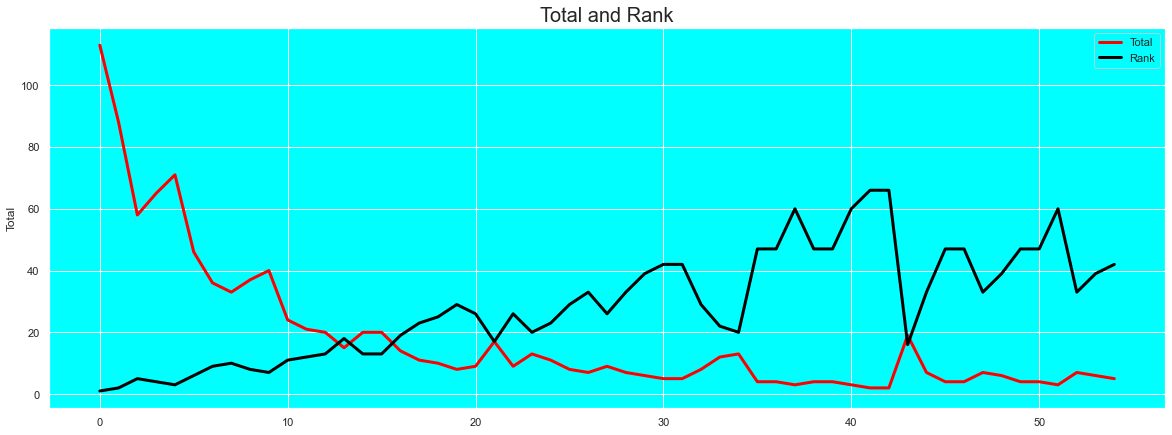

In [124]:
# hubungan antara rank dan total
plt.figure(figsize = (20,7))
sns.set(rc = {'axes.facecolor': 'cyan', 'axes.grid': True,})
sns.lineplot(data = Medals_Rank['Total'], linewidth = 3
             ,label = 'Total', color = 'red', markers = True)
sns.lineplot(data =  Medals_Rank['Rank by Total'], linewidth = 3
             ,label = 'Rank', color = 'black', markers= True)
plt.title('Total and Rank', fontsize = 20)
plt.show()

c:\users\novrianti\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



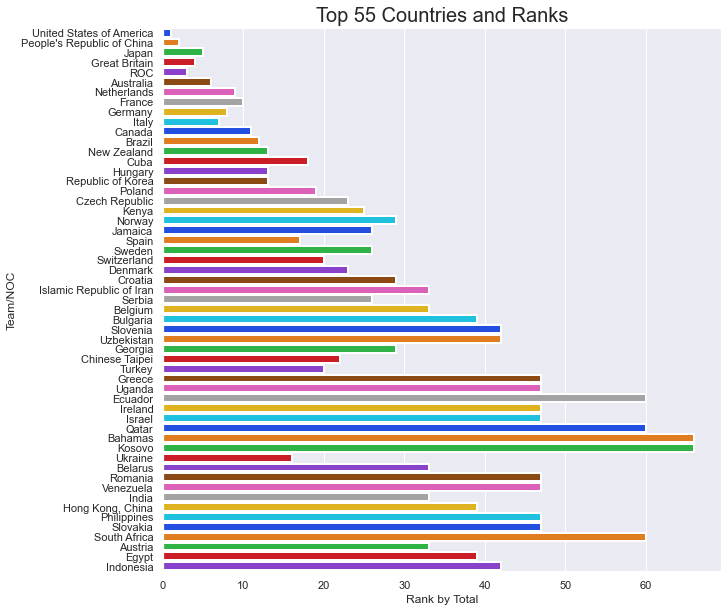

In [126]:
plt.figure(figsize=(10,10))
sns.set(rc = None)
sns.barplot(Medals_Rank['Rank by Total'],Medals_Rank['Team/NOC'],
            palette = sns.color_palette("bright", 
            n_colors=30), linewidth = 2)
plt.title('Top 55 Countries and Ranks', fontsize = 20)
plt.show()

In [127]:
Medals.head(10)

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
5,6,Australia,17,7,22,46,6
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10
8,9,Germany,10,11,16,37,8
9,10,Italy,10,10,20,40,7


In [128]:
Medals.isnull().sum()

Rank             0
Team/NOC         0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64

In [129]:
Medals.duplicated().sum()

0

In [130]:
Medals.shape

(93, 7)

In [131]:
# We can drop the rank column as it is same as serial number
Medals.drop(columns = 'Rank',inplace=True)

In [132]:
Medals_Top = Medals.head(55)
Medals_Top

,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3
5,Australia,17,7,22,46,6
6,Netherlands,10,12,14,36,9
7,France,10,12,11,33,10
8,Germany,10,11,16,37,8
9,Italy,10,10,20,40,7


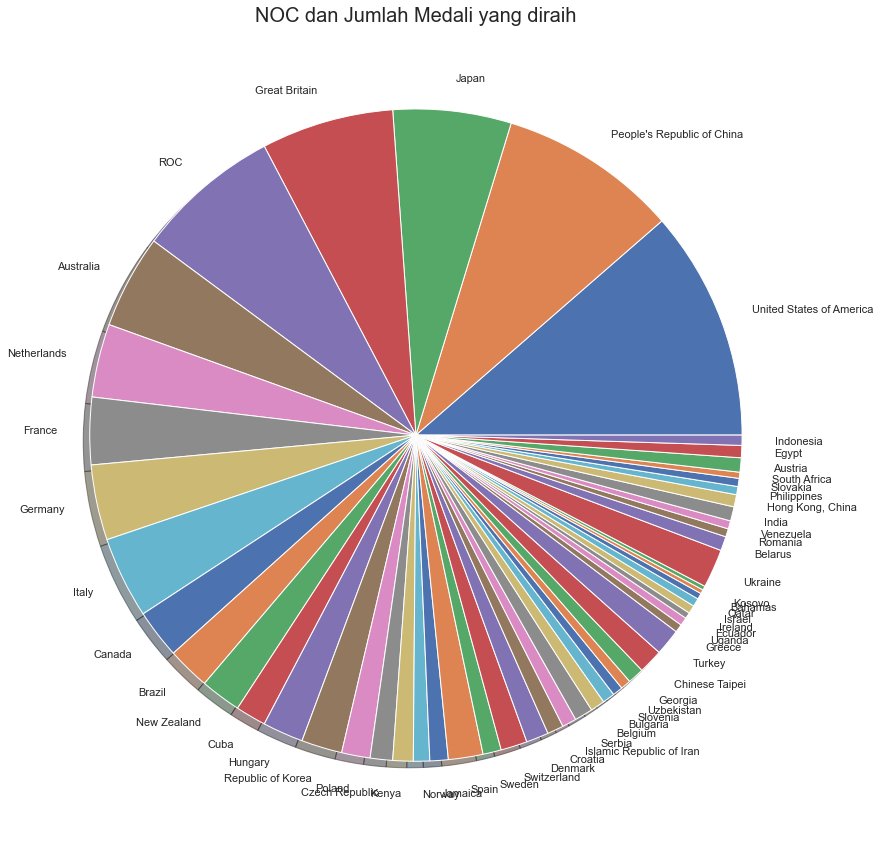

In [134]:
plt.figure(figsize=[15,15])
plt.pie(Medals_Top['Total'], labels = Medals_Top['Team/NOC'],shadow = True, )
plt.title('NOC dan Jumlah Medali yang diraih', fontsize = 20)
plt.show()

c:\users\novrianti\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



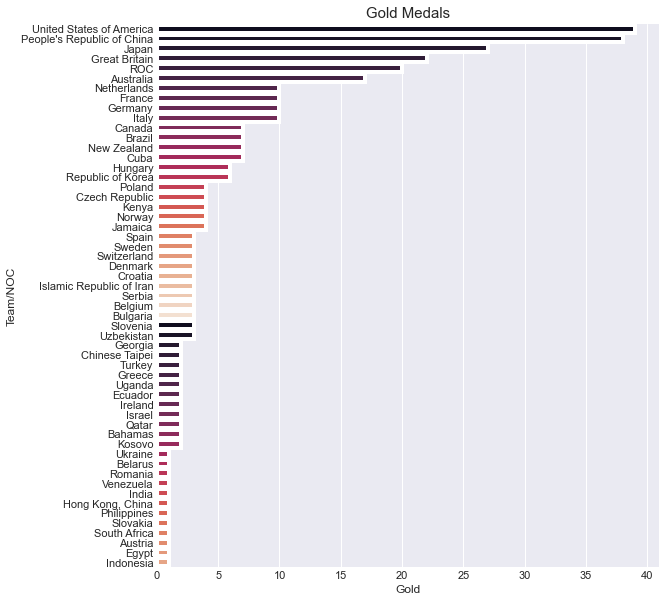

In [135]:
plt.figure(figsize=(9,10))
plt.style.use('seaborn-darkgrid')
sns.barplot(Medals_Top['Gold'],Medals_Top['Team/NOC'], 
            palette = sns.color_palette("rocket", 
            n_colors=30),
           linewidth = 4)
plt.title('Gold Medals', fontsize = 15)
plt.show()

c:\users\novrianti\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



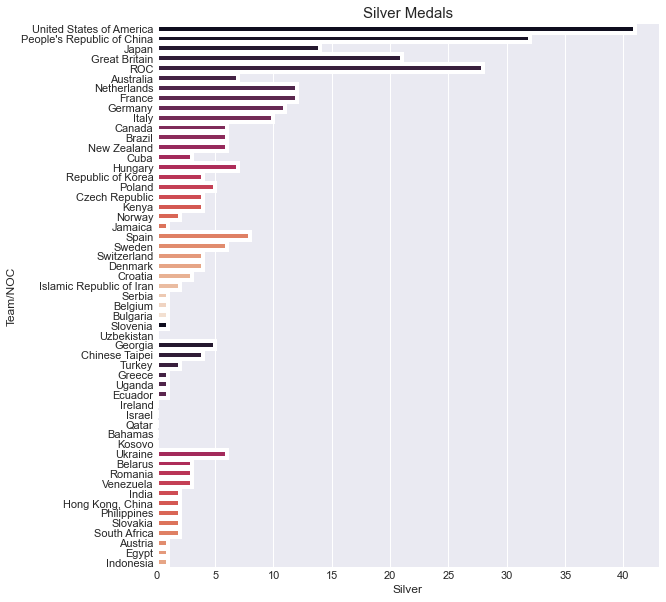

In [136]:
plt.figure(figsize=(9,10))
plt.style.use('seaborn-darkgrid')
sns.barplot(Medals_Top['Silver'],Medals_Top['Team/NOC'], 
            palette = sns.color_palette("rocket", 
            n_colors=30),
           linewidth = 4)
plt.title('Silver Medals', fontsize = 15)
plt.show()

c:\users\novrianti\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



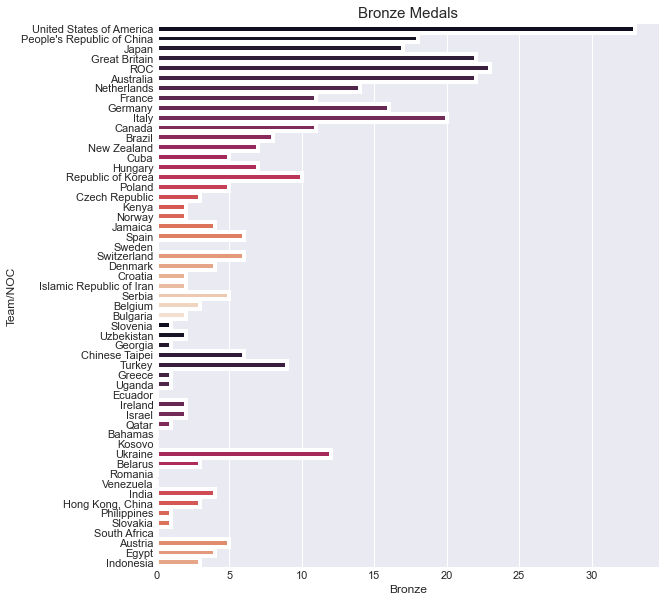

In [137]:
plt.figure(figsize=(9,10))
plt.style.use('seaborn-darkgrid')
sns.barplot(Medals_Top['Bronze'],Medals_Top['Team/NOC'], 
            palette = sns.color_palette("rocket", 
            n_colors=30),
           linewidth = 4)
plt.title('Bronze Medals', fontsize = 15)
plt.show()

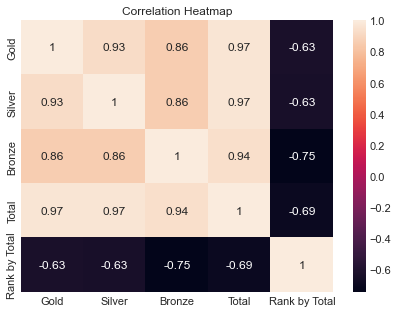

In [138]:
plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(Medals.corr(), annot=True)
heatmap.set_title('Correlation Heatmap')
plt.show()